###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from stefgrad.tensor import Tensor
from stefgrad.nn.networks import MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

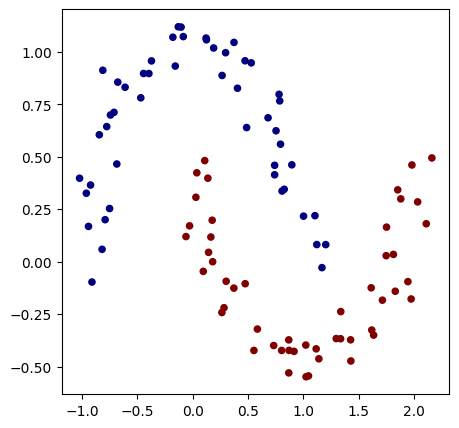

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network

In [6]:
print("Converting data to tensors...")
ten_x = [Tensor(x.tolist()) for x in X]  # Convert numpy arrays to tensors properly
ten_y = [Tensor(float(label)) for label in y]  # Ensure y values are scalar tensors

print("Data conversion successful!")
print("Sample tensor x:", ten_x[0])
print("Sample tensor y:", ten_y[0])

for k in range(100):
    # Reset gradients to zero before each iteration
    for p in model.parameters():
        p.grad = np.zeros_like(p.data)
    
    # Compute predictions for each input
    ypred_outputs = [model(x) for x in ten_x]

    # Compute loss for each prediction and accumulate  
    total_loss = Tensor(0.0)
    for i, y_out in enumerate(ypred_outputs):
        # Use squared error loss: (target - prediction)^2
        individual_loss = (ten_y[i] - y_out) * (ten_y[i] - y_out)
        total_loss = total_loss + individual_loss

    total_loss.backward()

    # Update parameters using gradient descent
    learning_rate = 0.01
    for p in model.parameters():
        p.data = p.data - learning_rate * p.grad

    if k % 10 == 0:
        print(f"Iteration {k}: loss = {total_loss.data:.6f}")

print(f"Final loss: {total_loss.data:.6f}")

# Test predictions on first few samples
print("\nFinal predictions:")
for i in range(5):
    pred = model(ten_x[i])
    print(f"Sample {i}: target={ten_y[i].data:.3f}, prediction={pred.data:.3f}")

Converting data to tensors...
Data conversion successful!
Sample tensor x: tensor([1.12211461 0.08147717])
Sample tensor y: tensor(-1.0)
Iteration 0: loss = 108.726998
Iteration 10: loss = 24.099876
Iteration 20: loss = 17.983702
Iteration 30: loss = 0.507068
Iteration 40: loss = 0.383770
Iteration 50: loss = 0.312700
Iteration 60: loss = 0.263997
Iteration 70: loss = 0.228103
Iteration 80: loss = 0.200481
Iteration 90: loss = 0.178566
Final loss: 0.162395

Final predictions:
Sample 0: target=-1.000, prediction=-0.944
Sample 1: target=-1.000, prediction=-0.955
Sample 2: target=1.000, prediction=0.970
Sample 3: target=-1.000, prediction=-0.991
Sample 4: target=1.000, prediction=0.992


In [7]:
# # loss function
# def loss(batch_size=None):
    
#     # inline DataLoader :)
#     if batch_size is None:
#         Xb, yb = X, y
#     else:
#         ri = np.random.permutation(X.shape[0])[:batch_size]
#         Xb, yb = X[ri], y[ri]
#     inputs = [map(Tensor, xrow) for xrow in Xb]
    
#     # forward the model to get scores
#     scores = map(model, inputs)
    
#     # svm "max-margin" loss
#     losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
#     data_loss = sum(losses) * (1.0 / len(losses))
#     # L2 regularization
#     alpha = 1e-4
#     reg_loss = alpha * sum((p*p for p in model.parameters()))
#     total_loss = data_loss + reg_loss
    
#     # also get accuracy
#     accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
#     return total_loss, sum(accuracy) / len(accuracy)

# total_loss, acc = loss()
# print(total_loss, acc)

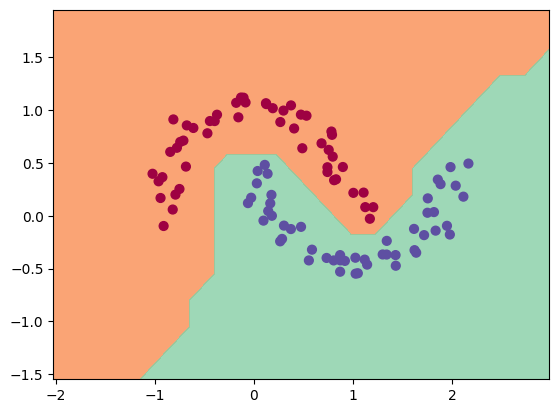

In [8]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [Tensor(x.tolist()) for x in Xmesh] 
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
